In [1]:
from matplotlib import pyplot as plt
import torch
import torchaudio
import numpy as np

waveform, sample_rate = torchaudio.load("../music/elaina/audio.mp3")
waveform_mono = torch.mean(waveform, dim=0).unsqueeze(0)
print("Shape of waveform: {}".format(waveform.size()))
print("Shape of waveform_mono: {}".format(waveform_mono.size()))
print("Shape of waveform_mono[0:10]: {}".format(waveform_mono[:,0:10000].size()))
print(f"{sample_rate=}")

Shape of waveform: torch.Size([2, 4314240])
Shape of waveform_mono: torch.Size([1, 4314240])
Shape of waveform_mono[0:10]: torch.Size([1, 10000])
sample_rate=48000


factor=0.011125945705384957
torch.Size([1, 201, 17977])
torch.Size([1, 201, 201])
torch.float32
torch.float32


C:\Users\kana_\AppData\Local\Temp\ipykernel_13696\2962288169.py:18: UserWarning: The input to TimeStretch must be complex type. Providing non-complex tensor produces invalid results.
  stretched = stretch(spec_resampled,1/factor).real


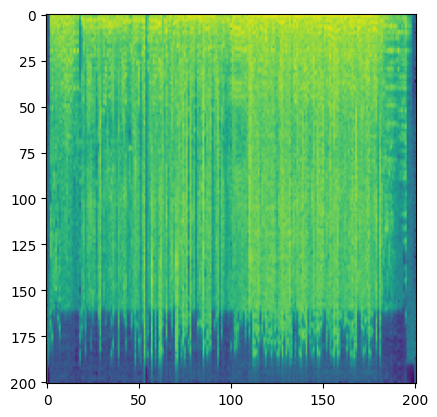

In [110]:
from torch import nn
from matplotlib import pyplot as plt

ideal_sr = 40000
duration = 1
factor = (sample_rate * duration)/waveform_mono.shape[1]
print(f"{factor=}")

resample = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=ideal_sr)
resampled = resample(waveform_mono)

spec = torchaudio.transforms.Spectrogram()
spec_resampled = spec(resampled)

# print(spec_resampled.shape)

stretch = torchaudio.transforms.TimeStretch()
stretched = stretch(spec_resampled,1/factor).real
print(spec_resampled.shape)
print(stretched.shape)
print(spec_resampled.dtype)
print(stretched.dtype)

plt.figure()
plt.imshow(np.log(stretched[0].detach()))
plt.show()

c:\Users\kana_\.conda\envs\taiko-ai\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
C:\Users\kana_\AppData\Local\Temp\ipykernel_15092\2147364999.py:19: UserWarning: The input to TimeStretch must be complex type. Providing non-complex tensor produces invalid results.
  stretched = self.stretch(spec_resampled,1/factor).real
C:\Users\kana_\AppData\Local\Temp\ipykernel_15092\2147364999.py:33: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(stretched[0].detach()))


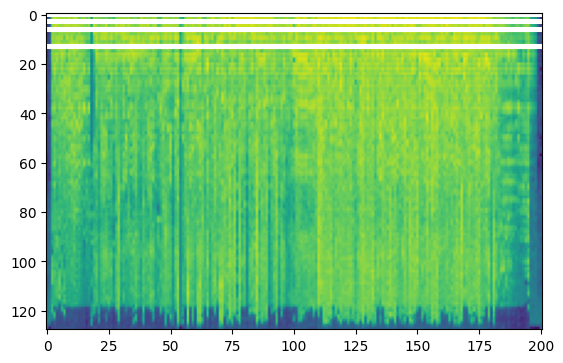

In [7]:
from torch import nn

class AudioTransformPipeline(nn.Module):
    def __init__(self, sample_rate, ideal_sr, duration):
        super().__init__()
        self.sample_rate = sample_rate
        self.ideal_sr = ideal_sr
        self.duration = duration
        
        self.resample = torchaudio.transforms.Resample(orig_freq=self.sample_rate, new_freq=self.ideal_sr)
        self.spec = torchaudio.transforms.Spectrogram()
        self.stretch = torchaudio.transforms.TimeStretch()
        self.mel = torchaudio.transforms.MelScale()

    def forward(self, waveform):
        if (waveform.shape[1] == 0):
            raise ValueError("The waveform is empty")
        factor = (self.sample_rate * self.duration)/waveform.shape[1]
        resampled = self.resample(waveform)
        spec_resampled = self.spec(resampled)
        stretched = self.stretch(spec_resampled,1/factor).real
        mel = self.mel(stretched)
        
        return mel
    
atp = AudioTransformPipeline(sample_rate, 40000, 1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
waveform_mono_device = waveform_mono.to(device)
atp = atp.to(device)
stretched = atp(waveform_mono_device)
stretched = stretched.cpu()
# stretched = atp(waveform_mono)

plt.figure()
plt.imshow(np.log(stretched[0].detach()))
plt.show()

In [11]:
sliced_waveform = waveform_mono[:,int(sample_rate * 1):int(sample_rate * 10)]
print("Shape of sliced waveform: {}".format(sliced_waveform.size()))

Shape of sliced waveform: torch.Size([1, 432000])


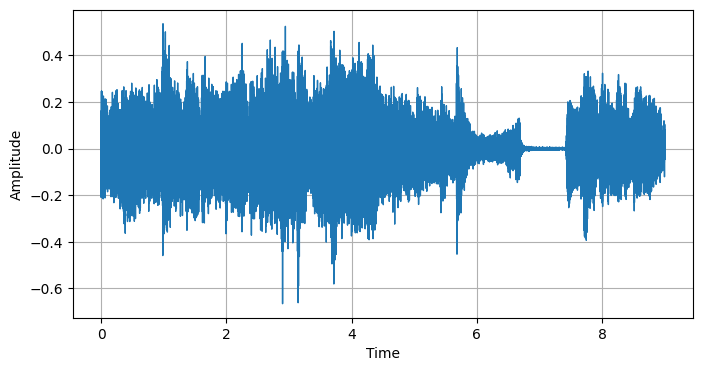

In [29]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    
    time_axis = np.linspace(0, num_frames / sample_rate, num_frames)
    
    plt.figure(figsize=(8, 4))
    for c in range(num_channels):
        plt.plot(time_axis, waveform[c], linewidth=1)
    
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.show()

plot_waveform(sliced_waveform, sample_rate)

In [22]:
sliced_waveform = waveform_mono[:,int(sample_rate * 1):int(sample_rate * 1.3)]
one_sec = sample_rate*1
sliced_waveform_shape = sliced_waveform.shape[1]
factor = one_sec/sliced_waveform_shape
print(factor)
print(sliced_waveform.shape)


spectrogram = torchaudio.transforms.Spectrogram(power=None)
stretch = torchaudio.transforms.TimeStretch()
orig_spectrogram = spectrogram(sliced_waveform)
sliced_waveform_stretched = stretch(orig_spectrogram, 0.1)


# sliced_waveform_stretched = torchaudio.transforms.TimeStretch(fixed_rate=one_sec/sliced_waveform_shape)(sliced_waveform)


print("Shape of orig_spectrogram: {}".format(orig_spectrogram.size()))
print("Shape of sliced_waveform_stretched: {}".format(sliced_waveform_stretched.size()))

3.3333333333333335
torch.Size([1, 14400])
Shape of orig_spectrogram: torch.Size([1, 201, 73])
Shape of sliced_waveform_stretched: torch.Size([1, 201, 730])


In [12]:
import sys
import os
sys.path.append('..')

import utils

reader = utils.osu_reader.OsuTaikoReader



# folder = "../music/1342378/"

# files = [f"../music/1342378/{f}" for f in os.listdir(folder) if f.endswith(".osu")]
# readers = [utils.osu_reader.OsuTaikoReader(f) for f in files]

# print(readers)

AttributeError: module 'utils' has no attribute 'osu_reader'